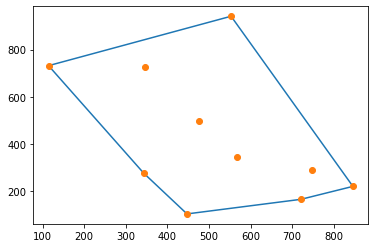

In [5]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

class grahm:
    def __init__(self):
        self.stack1=[]
        self.x=random.sample(range(0, 1000), 10)
        self.y=random.sample(range(0, 1000), 10)
        self.min_index=self.y.index(np.min(self.y))


    def angle(self,x1,y1,x2,y2):
        angle=math.atan2((y2-y1),(x2-x1))*(180/math.pi)
        if angle<0:
            angle=180+abs(angle)
        return angle
    
    def check_rotation(self,ax,ay,bx,by,cx,cy):
        area=((bx-ax)*(cy-ay))-((by-ay)*(cx-ax))
        if area>0:
            return 1
        elif area<0:
            return -1
        else:
            return 0

    def sort(self):
        temp_angle={}
        for val in range(len(self.y)):
            try:
                temp_angle.update({val:self.angle(self.x[self.min_index],self.y[self.min_index],self.x[val],self.y[val])})
            except:
                pass
        sorted_index=sorted(temp_angle, key=temp_angle.get)[0:len(self.y)]
        sorted_angles=sorted(temp_angle.values())[0:len(self.y)]
        return sorted_index,sorted_angles

    def plot(self,array,sorted_index):
        self.newx=[]
        self.newy=[]
        for val in array:
            self.newx.append(self.x[val])
            self.newy.append(self.y[val])
        self.newx.append(self.x[sorted_index[0]])
        self.newy.append(self.y[sorted_index[0]])
        plt.plot(self.newx,self.newy)
        plt.plot(self.x,self.y,'o')
        plt.show()
    
    def three_points(self):
        ax=self.x[self.stack1[-3]]
        ay=self.y[self.stack1[-3]]
        bx=self.x[self.stack1[-2]]
        by=self.y[self.stack1[-2]]
        cx=self.x[self.stack1[-1]]
        cy=self.y[self.stack1[-1]]
        return ax,ay,bx,by,cx,cy
    
    def check(self):
        ax,ay,bx,by,cx,cy=self.three_points()
        if self.check_rotation(ax,ay,bx,by,cx,cy)==1:
            return
        else:
            del self.stack1[-2]
            self.check()

    def main(self):
        sorted_index,sorted_angles=self.sort()
        self.stack1.append(sorted_index[0])
        temp=1
        while self.stack1[-1]!=sorted_index[-1]:
            if len(self.stack1)>=3:
                ax,ay,bx,by,cx,cy=self.three_points()
                if self.check_rotation(ax,ay,bx,by,cx,cy)==1:
                    self.stack1.append(sorted_index[temp])
                elif self.check_rotation(ax,ay,bx,by,cx,cy)==-1:
                    del self.stack1[-2]
                    self.stack1.append(sorted_index[temp])
                elif self.check_rotation(ax,ay,bx,by,cx,cy)==0:
                    del self.stack1[-2]
                    self.stack1.append(sorted_index[temp])
                self.check()
            else:
                self.stack1.append(sorted_index[temp])
            temp+=1
        self.plot(self.stack1,sorted_index)
        

gr=grahm()
gr.main()

